In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import os.path as path
import time
import glob 

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import numpy as np
import pandas as pd
#import geopandas as gpd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import utils

In [5]:
DEFAULT_IMAGE_DIR_NAME = ('/data1/fog-data/fog-maps/2009/')
input = '/data1/fog/Dataset/24HOURS/INPUT/'

files = sorted(glob.glob(os.path.join(input, '*.npz')))
files

['/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2009_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2010_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2011_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2012_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2013_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2014_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2015_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2016_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2017_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2018_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2019_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_MIXED_CUBE_2020_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_NAM_CUBE_2009_PhG1_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_NAM_CUBE_2009_PhG2_24.npz',
 '/data1/fog/Dataset/24HOURS/INPUT/NETCDF_NAM_CUBE_2009_

In [6]:
this_cube = utils.load_cube(files[60])
this_cube.shape

(692, 384, 384, 1)

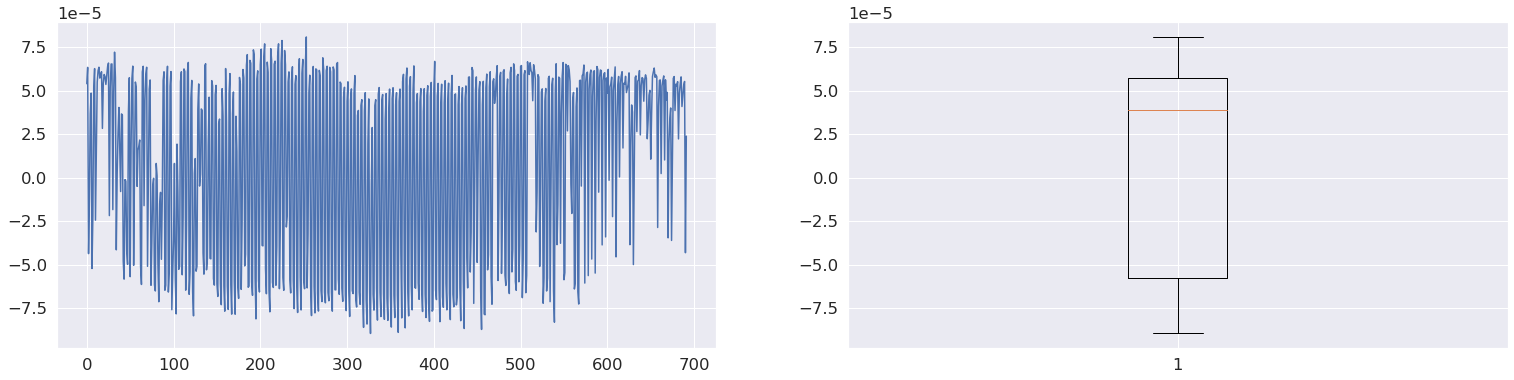

In [56]:
t0, t1, t2, t3 = [], [], [], []

for i in range(this_cube.shape[0]):
    t0.append(np.mean(this_cube[i, :, :, 0]))
    #t1.append(np.mean(this_cube[i, :, :, 1]))
    #t2.append(np.mean(this_cube[i, :, :, 2]))
    #t3.append(np.mean(this_cube[i, :, :, 3]))


fig, axs = plt.subplots(1,2, figsize = (26,6))
axs[0].plot(t0)
#axs[0].plot(t1)
#axs[0].plot(t2)
#axs[0].plot(t3)


axs[1].boxplot([t0])
None

In [7]:
#==========================================================================
YEAR_FOG_DIR_NAME = '.'
ALL_FOG_DIR_NAME = '..'
#DEFAULT_IMAGE_DIR_NAME = ('./Dataset/')
DEFAULT_IMAGE_DIR_NAME = ('/data1/fog-data/fog-maps/')
#DEFAULT_IMAGE_DIR_NAME = ('/data1/fog-data/fog-maps/2018/')
DEFAULT_NAMES_DIR_NAME = ('./data1/fog/Dataset/NAMES/')
DEFAULT_CUBES_DIR_NAME = ('/data1/fog/Dataset/INPUT/MinMax/')
DEFAULT_CUBES_12_DIR_NAME = ('/data1/fog/Dataset/INPUT/12Hours/')
DEFAULT_TARGET_DIR_NAME = ('/data1/fog/Dataset/TARGET')
SEPARATOR_STRING = '\n\n' + '*' * 50 + '\n\n'
MINOR_SEPARATOR_STRING = '\n\n' + '-' * 50 + '\n\n'

DATE_FORMAT = '%Y%m%d'
DATE_FORMAT_REGEX = '[0-9][0-9][0-9][0-9][0-1][0-9][0-3][0-9]'
TIME_CYCLE_FORMAT = '[0-9][0-9][0][0]'
HOUR_PREDICTION_FORMAT = '[0][0-9][0-9]'
#==========================================================================
# Reading the target first: 
 


year_information = {'2009':['20090101', '20091231'],
'2010':['20100101', '20101231'],
'2011':['20110101', '20111231'],
'2012':['20120101', '20121231'],
'2013':['20130101', '20131231'],
'2014':['20140101', '20141231'],
'2015':['20150101', '20151231'],
'2016':['20160101', '20161231'],
'2017':['20170101', '20171231'],
'2018':['20180101', '20181231'],
'2019':['20190101', '20191231'],
'2020':['20200101', '20201231']}


sst_cube_names = {'2009':['NETCDF_SST_CUBE_2009.npz'],
'2010':['NETCDF_SST_CUBE_2010.npz'],
'2011':['NETCDF_SST_CUBE_2011.npz'],
'2012':['NETCDF_SST_CUBE_2012.npz'],
'2013':['NETCDF_SST_CUBE_2013.npz'],
'2014':['NETCDF_SST_CUBE_2014.npz'],
'2015':['NETCDF_SST_CUBE_2015.npz'],
'2016':['NETCDF_SST_CUBE_2016.npz'],
'2017':['NETCDF_SST_CUBE_2017.npz'],
'2018':['NETCDF_SST_CUBE_2018.npz'],
'2019':['NETCDF_SST_CUBE_2019.npz'],
'2020':['NETCDF_SST_CUBE_2020.npz']}


In [9]:
CSVfile = '{0:s}/Target.csv'.format(DEFAULT_TARGET_DIR_NAME)
target = utils.reading_csv_target_file(CSVfile)

year = '2020'
year_dir = DEFAULT_IMAGE_DIR_NAME + year + '/'
first_date_string, last_date_string = year_information['2020']


nam_cubes_names, mur_cubes_names, targets = utils.find_map_name_date(first_date_string= first_date_string, 
                                                                last_date_string=last_date_string, 
                                                                target = target, 
                                                                image_dir_name= year_dir)

nam_concatcubes_names = utils.find_nam_cubes_name_hourpredict(nam_cubes_names,
                                                        hour_prediction_names = ['000', '006', '012','024'])

Mur12cubes_names = []
Mur12cubes_names = utils.copy_mur_name_ntimes(mur_cubes_names, Mur12cubes_names, 16)


In [84]:
for m in range(len(nam_cubes_names)):
    this_cube = utils.read_nam_maps(nam_cubes_names[m], utils.NETCDF_PREDICTOR_NAMES['NewOrder'])
    print(this_cube)

AttributeError: 'dict' object has no attribute 'shape'